# 4: FEATURE ENGINEERING

Normalization of data can be achieved by Min-Max scaling; the formula is given below, which will scale all numeric values in the range 0 to 1.Ensure that we remove extreme outliers before applying the above technique as it can skew the normal values in your data to a small interval.

The standardization technique will transform the variables to have a zero mean and standard deviation of one. The formula for standardization is given below and the outcome is commonly known as z-scores.

In [1]:
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
import statsmodels.api as sm
from sklearn import datasets
from sklearn import preprocessing
import matplotlib.pyplot as plt

C:\Users\Sachin\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:23: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


Here we are first taking data and then transorming data using normalization and standardization technique both on iris dataset.

In [2]:
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target
std_scale = preprocessing.StandardScaler().fit(X)
X_std = std_scale.transform(X)
X1 = pd.DataFrame(data = X_std)
print("\nStandardization :\n")
print(X1.head(2))
minmax_scale = preprocessing.MinMaxScaler().fit(X)
X_minmax = minmax_scale.transform(X)
X2 = pd.DataFrame(data = X_minmax)
print("\nNormalization :\n")
print(X2.head(2))


Standardization :

          0         1
0 -1.340227 -1.315444
1 -1.340227 -1.315444

Normalization :

          0         1
0  0.067797  0.041667
1  0.067797  0.041667


Here we are taking iris data set and storing it first in a data frame and storing species as ordinal values. After that we are printing the entire information about datasets like mean, median, std, min, max etc.

In [3]:
iris = datasets.load_iris()
iris = pd.DataFrame(data= np.c_[iris['data'], iris['target']],columns= iris['feature_names'] + ['species'])
iris.species = np.where(iris.species == 0.0, 'setosa', np.where(iris.species==1.0,'versicolor', 'virginica'))
iris.columns = iris.columns.str.replace('','')
print(iris.describe())

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000  


Here we are printing the total count of flowers of each species.

In [4]:
print(iris['species'].value_counts())

versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64


Here we are plotting a histogram for iris data set and giving it a title using suptitle command. We are also selecting the font size of the title of histogram.

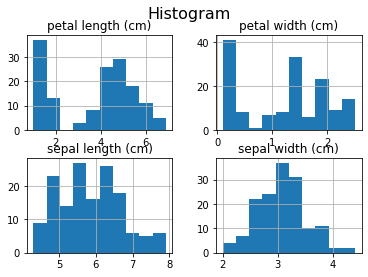

In [5]:
iris.hist() 
plt.suptitle('Histogram',fontsize=16)
plt.show()

Here we are plotting box plot for all the features in iris data set.It helps us to select the best feature with proper standard deviation and less outliers.It shows ouliers, median, max value and min value using box graph.

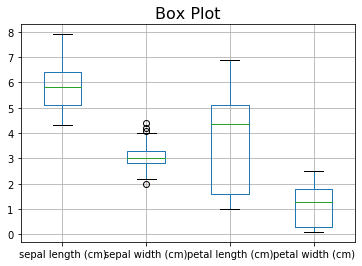

In [6]:
iris.boxplot() 
plt.title('Box Plot', fontsize=16)
plt.show()

In multivariate analysis we try to examine the relationship of all variables with each other.
here we are plotting graphs for mean value of each features specie wise.Each feature is represented by different colour as by legends.

            sepal length (cm)  sepal width (cm)  petal length (cm)  \
species                                                              
setosa                  5.006             3.428              1.462   
versicolor              5.936             2.770              4.260   
virginica               6.588             2.974              5.552   

            petal width (cm)  
species                       
setosa                 0.246  
versicolor             1.326  
virginica              2.026  


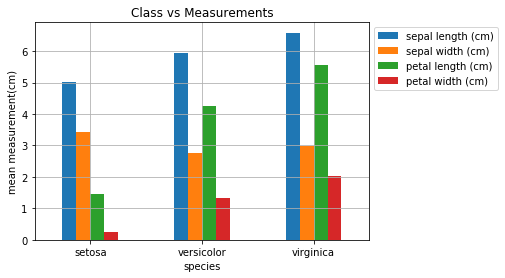

In [7]:
print(iris.groupby(by = "species").mean())
# plot for mean of each feature for each label class
iris.groupby(by = "species").mean().plot(kind="bar")
plt.title('Class vs Measurements')
plt.ylabel('mean measurement(cm)')
plt.xticks(rotation=0) # manage the xticks rotation
plt.grid(True)
# Use bbox_to_anchor option to place the legend outside plot area to be tidy
plt.legend(loc="upper left", bbox_to_anchor=(1,1))
plt.show()

The correlation function uses Pearson correlation coefficient, which results in a number between -1 to 1.A strong negative relationship is indicated by a coefficient closer to -1 and a strong positive correlation is indicated by a coefficient toward 1.

The correlation plot shows the correlation matrix by use of colours.Darker the colour higher the correlation.Lighter colour represents negative and low correlation.

                   sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)           1.000000         -0.117570           0.871754   
sepal width (cm)           -0.117570          1.000000          -0.428440   
petal length (cm)           0.871754         -0.428440           1.000000   
petal width (cm)            0.817941         -0.366126           0.962865   

                   petal width (cm)  
sepal length (cm)          0.817941  
sepal width (cm)          -0.366126  
petal length (cm)          0.962865  
petal width (cm)           1.000000  


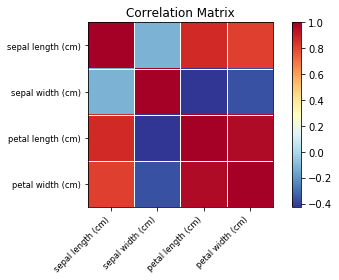

In [8]:
corr = iris.corr()
print(corr)
sm.graphics.plot_corr(corr, xnames=list(corr.columns))
plt.show()

We can understand the relationship attributes by looking at the distribution of the interactions of each pair of attributes. This uses a built-in function creates a matrix of scatter plots of all attributes against all attributes.Histograms are formed for correlation between similar features and scatter plots for rest.

Text(0.5, 0.98, 'Pair Plot')

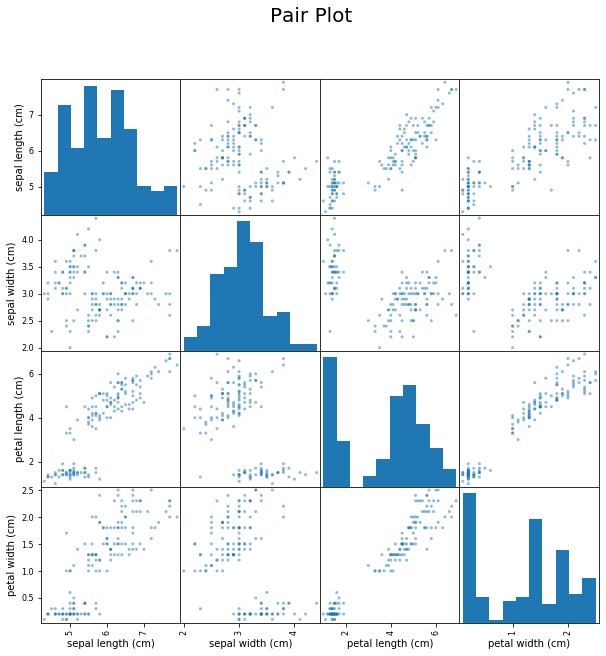

In [9]:
scatter_matrix(iris, figsize=(10, 10))
# use suptitle to add title to all sublots
plt.suptitle("Pair Plot", fontsize=20)

Submitted By: 
Sachin Rawat
RA1912039010003
Big Data Analytics